In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# Corrected file path, removed double forward slash
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/BTS_MRT_2021.csv')


Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


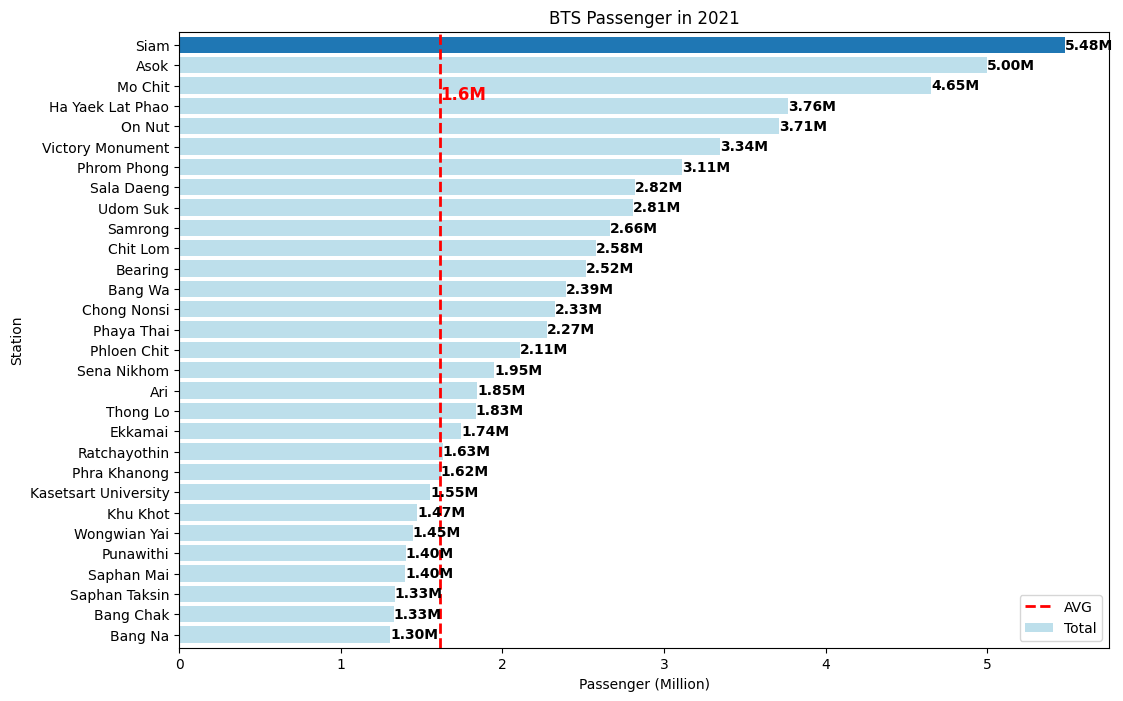

In [47]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# Corrected file path, removed double forward slash
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/BTS_MRT_2021.csv')

# Filter DataFrame to include only rows where 'Type' is 'BTS'
df_bts = df[df['Type'] == 'BTS'].copy()

# Convert 'Total' column to numeric (remove commas if present)
df_bts['Total'] = pd.to_numeric(df_bts['Total'].astype(str).str.replace(',', ''), errors='coerce')

# Adjust the 'Total' to per day by dividing by 365
df_bts['Total'] = df_bts['Total']  # Assuming 'Total' is already in daily values

# Group by 'Station' and sum 'Total' values
station_total = df_bts.groupby('Station')['Total'].sum()

# Shorten station names to 20 characters max
df_bts['Station'] = df_bts['Station'].apply(lambda x: x[:20])

# Calculate the average total value
average_value = station_total.mean()

# Convert values to millions for better readability
station_total_million = station_total / 1_000_000
average_value_million = average_value / 1_000_000

# Sort all stations in ascending order (smallest to largest total)
station_total_sorted = station_total_million.sort_values(ascending=True).tail(30)  # Keep the top 30 values

# Define colors: first set all to light blue, then change the top (largest) bar to dark blue
colors = ['#add8e6' for _ in range(len(station_total_sorted))]  # Light blue for all
colors[-1] = '#1f77b4'  # Dark blue for the top value (last in ascending order)

# Plot a horizontal bar chart
bars = station_total_sorted.plot(kind='barh', figsize=(12, 8), color=colors, width=0.8)

# Set transparency for all bars except the highest value
for i, bar in enumerate(bars.patches):
    if i < len(bars.patches) - 1:
        bar.set_alpha(0.8)  # Set transparency to 80%

    # Add values on top of bars
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.2f}M', ha='left', va='center', fontsize=10, fontweight='bold')

# Add an average line without the numerical value in the legend
plt.axvline(average_value_million, color='red', linestyle='dashed', linewidth=2, label='AVG')

# Annotate the average line with its exact value on the chart
plt.text(average_value_million, len(station_total_sorted) * 0.9, f'{average_value_million:,.1f}M',
         color='red', fontsize=12, verticalalignment='top', fontweight='bold')

# Add title and labels
plt.title('BTS Passenger in 2021')
plt.xlabel('Passenger (Million)')
plt.ylabel('Station')

# Show legend
plt.legend()  # Legend will only display "AVG" without values

# Save plot to file
plt.savefig('bts_passenger_chart.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [22]:
!pip install squarify

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


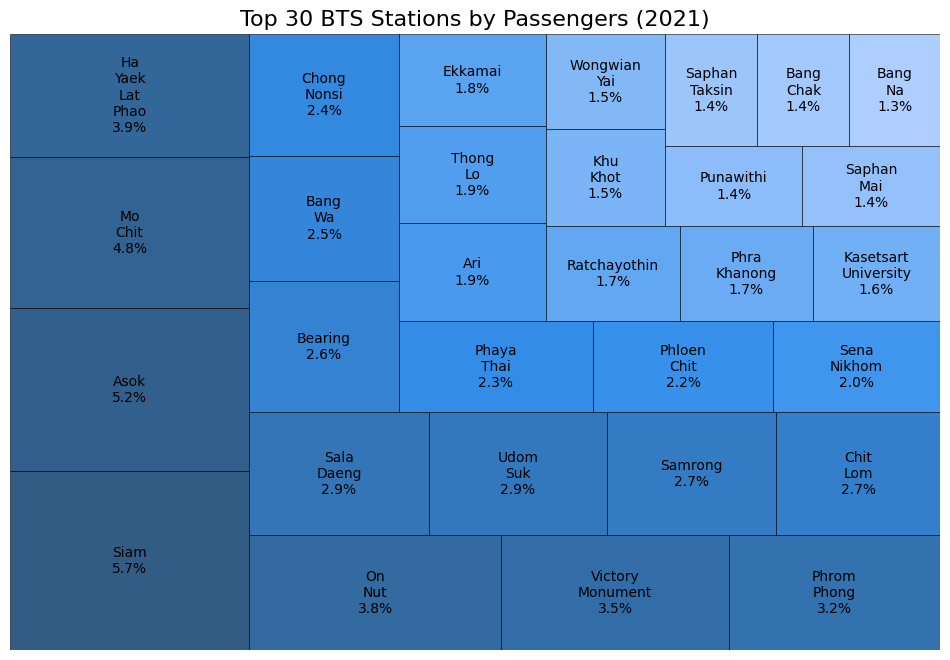

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # Import the squarify library to plot treemaps
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/BTS_MRT_2021.csv')

# Filter DataFrame to include only rows where 'Type' is 'BTS'
df_bts = df[df['Type'] == 'BTS'].copy()

# Convert 'Total' column to numeric (remove commas if present)
df_bts['Total'] = pd.to_numeric(df_bts['Total'].astype(str).str.replace(',', ''), errors='coerce')

# Shorten station names to 20 characters max
df_bts['Station'] = df_bts['Station'].apply(lambda x: x[:20])

# Group by 'Station' and sum 'Total' values
station_total = df_bts.groupby('Station')['Total'].sum()

# Calculate the percentage for each station
total_sum = station_total.sum()
percentages = (station_total / total_sum) * 100

# Convert values to millions for better readability
station_total_million = station_total / 1_000_000
percentages = percentages.round(1)  # Round percentages to 1 decimal place

# Sort all stations in descending order (largest to smallest total)
station_total_sorted = station_total_million.sort_values(ascending=False).head(30)  # Keep the top 30 values
percentages_sorted = percentages[station_total_sorted.index]  # Get the sorted percentages

# ✅ Fixed Function
def format_labels(stations, percentages):
    formatted_labels = []
    for station, percent in zip(stations, percentages):
        station_wrapped = station.replace(' ', '\n')  # Replace spaces with newlines
        formatted_labels.append(f"{station_wrapped}\n{percent:.1f}%")
    return formatted_labels

# 🎨 Generate blue gradient from dark blue to light blue
blue_cmap = LinearSegmentedColormap.from_list("blue_gradient", ["#003366", "#0073e6", "#99c2ff"], N=len(station_total_sorted))

# Generate colors based on ranking
normalized_ranks = np.linspace(0, 1, len(station_total_sorted))  # Higher values get darker colors
blue_colors = [blue_cmap(rank) for rank in normalized_ranks]

# Plot the treemap
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=station_total_sorted,
              label=formatted_labels,  # Use formatted labels
              color=blue_colors,  # Apply blue gradient colors
              alpha=0.8, linewidth=0.5, edgecolor='black')

# Add a title
plt.title('Top 30 BTS Stations by Passengers (2021)', fontsize=16)

# Show the plot
plt.axis('off')  # Hide the axis

# Save plot to file
plt.savefig('tree_map_bts_station.png', dpi=300, bbox_inches='tight')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


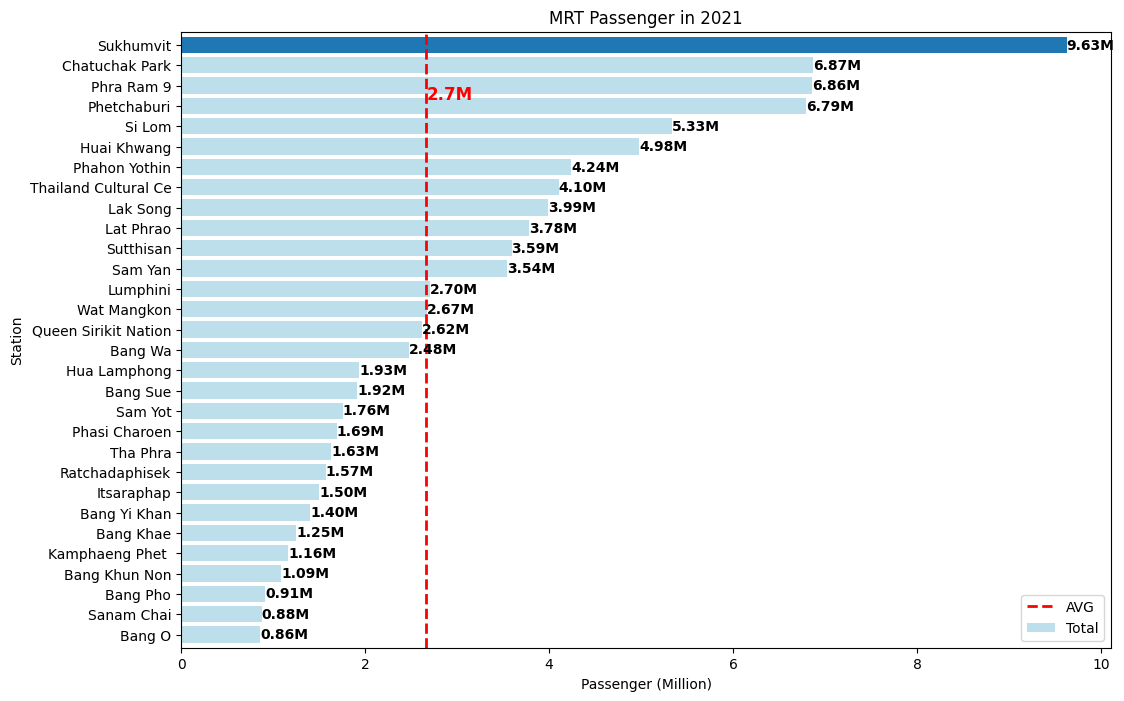

In [46]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# Corrected file path, removed double forward slash
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/BTS_MRT_2021.csv')

# Filter DataFrame to include only rows where 'Type' is 'BTS'
df_bts = df[df['Type'] == 'MRT'].copy()

# Convert 'Total' column to numeric (remove commas if present)
df_bts['Total'] = pd.to_numeric(df_bts['Total'].astype(str).str.replace(',', ''), errors='coerce')

# Adjust the 'Total' to per day by dividing by 365
df_bts['Total'] = df_bts['Total']  # Assuming 'Total' is already in daily values

# Shorten station names to 20 characters max
df_bts['Station'] = df_bts['Station'].apply(lambda x: x[:20])

# Group by 'Station' and sum 'Total' values
station_total = df_bts.groupby('Station')['Total'].sum()

# Calculate the average total value
average_value = station_total.mean()

# Convert values to millions for better readability
station_total_million = station_total / 1_000_000
average_value_million = average_value / 1_000_000

# Sort all stations in ascending order (smallest to largest total)
station_total_sorted = station_total_million.sort_values(ascending=True).tail(30)  # Keep the top 30 values

# Define colors: first set all to light blue, then change the top (largest) bar to dark blue
colors = ['#add8e6' for _ in range(len(station_total_sorted))]  # Light blue for all
colors[-1] = '#1f77b4'  # Dark blue for the top value (last in ascending order)

# Plot a horizontal bar chart with increased width and reduced spacing between bars
bars = station_total_sorted.plot(kind='barh', figsize=(12, 8), color=colors, width=0.8)

# Set transparency for all bars except the highest value
for i, bar in enumerate(bars.patches):
    if i < len(bars.patches) - 1:
        bar.set_alpha(0.8)  # Set transparency to 80%

    # Add values closer to the top of bars
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.2f}M', ha='left', va='center', fontsize=10, fontweight='bold')

# Add an average line without the numerical value in the legend
plt.axvline(average_value_million, color='red', linestyle='dashed', linewidth=2, label='AVG')

# Annotate the average line with its exact value on the chart
plt.text(average_value_million, len(station_total_sorted) * 0.9, f'{average_value_million:,.1f}M',
         color='red', fontsize=12, verticalalignment='top', fontweight='bold')

# Add title and labels
plt.title('MRT Passenger in 2021')
plt.xlabel('Passenger (Million)')
plt.ylabel('Station')

# Show legend
plt.legend()  # Legend will only display "AVG" without values

# Save plot to file
plt.savefig('mrt_passenger_chart.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


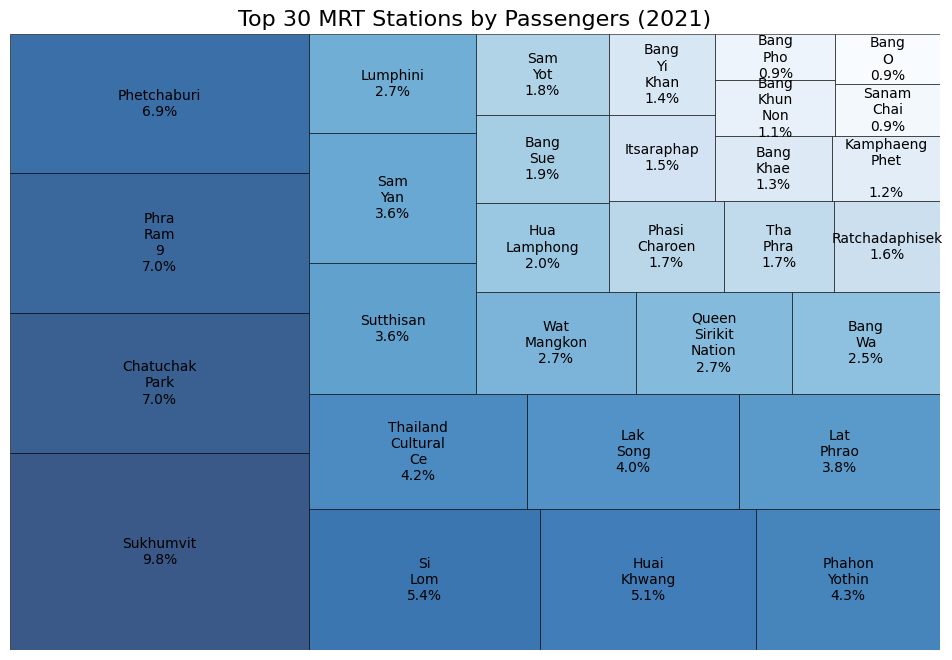

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # Import the squarify library to plot treemaps
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/BTS_MRT_2021.csv')

# Filter DataFrame to include only rows where 'Type' is 'MRT'
df_bts = df[df['Type'] == 'MRT'].copy()

# Convert 'Total' column to numeric (remove commas if present)
df_bts['Total'] = pd.to_numeric(df_bts['Total'].astype(str).str.replace(',', ''), errors='coerce')

# Adjust the 'Total' to per day by dividing by 365 (if needed)
df_bts['Total'] = df_bts['Total']  # If you need to adjust the values for daily totals, divide here



# Group by 'Station' and sum 'Total' values
station_total = df_bts.groupby('Station')['Total'].sum()

# Calculate the percentage for each station
total_sum = station_total.sum()
percentages = (station_total / total_sum) * 100

# Convert values to millions for better readability
station_total_million = station_total / 1_000_000
percentages = percentages.round(1)  # Round percentages to 1 decimal place

# Sort all stations in descending order (largest to smallest total)
station_total_sorted = station_total_million.sort_values(ascending=False).head(30)  # Keep the top 30 values
percentages_sorted = percentages[station_total_sorted.index]  # Get the sorted percentages


# 🎨 Generate blue gradient from dark blue to light blue
blue_cmap = plt.cm.Blues  # Using the built-in blue color map
blue_colors = blue_cmap(np.linspace(1, 0, len(station_total_sorted)))

# Plot the treemap
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=station_total_sorted,
              label=formatted_labels,  # Use formatted labels
              color=blue_colors,  # Apply blue gradient colors
              alpha=0.8, linewidth=0.5, edgecolor='black')

# Add a title
plt.title('Top 30 MRT Stations by Passengers (2021)', fontsize=16)

# Show the plot
plt.axis('off')  # Hide the axis

# Save plot to file
plt.savefig('tree_map_mrt_station.png', dpi=300, bbox_inches='tight')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


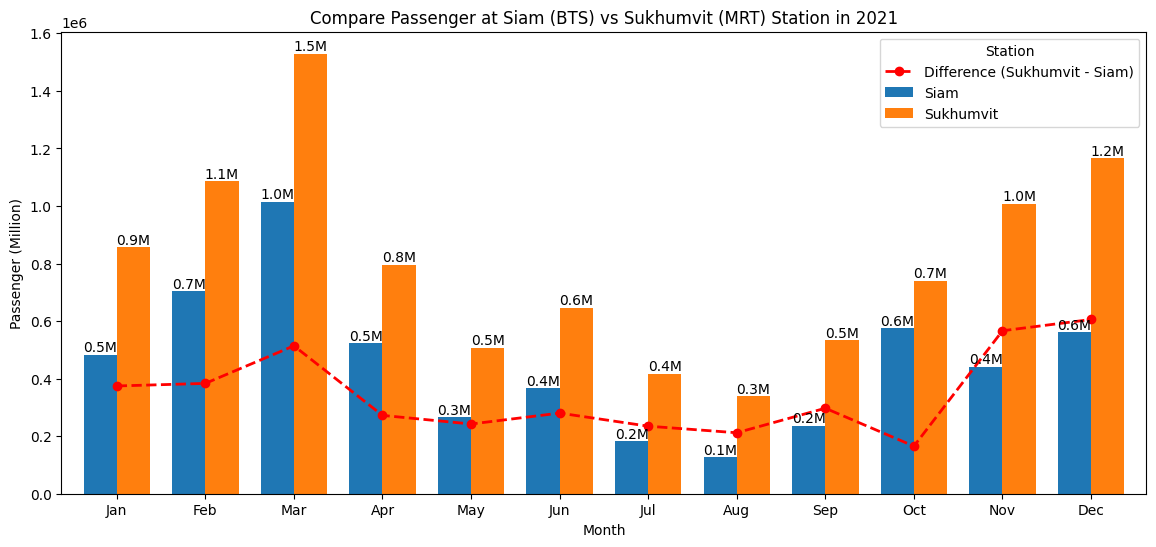

In [7]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# Corrected file path, removed double forward slash
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/BTS_MRT_2021.csv')

# Filter DataFrame for 'Siam' and 'Sukhumvit' stations
df_selected = df[df['Station'].isin(['Siam', 'Sukhumvit'])]

# Select only the columns for months (assuming they are named 'Jan' to 'Dec')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_selected = df_selected.set_index('Station')[months]

# Convert monthly values to numeric (handle commas if present)
df_selected = df_selected.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

# Compute the difference between 'Sukhumvit' and 'Siam' for each month
df_diff = df_selected.loc['Sukhumvit'] - df_selected.loc['Siam']

# Plot a grouped bar chart with increased bar width
ax = df_selected.T.plot(kind='bar', figsize=(14, 6), width=0.75)  # Increase width here

# Add title and labels
plt.title('Compare Passenger at Siam (BTS) vs Sukhumvit (MRT) Station in 2021')
plt.xlabel('Month')
plt.ylabel('Passenger (Million)')  # Change 'Unit' to 'Passenger (Million)'
plt.xticks(rotation=45)
plt.xticks(rotation=0)

# Show legend
plt.legend(title='Station')

# Add value labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height / 1e6:.1f}M',
            ha='center', va='bottom', fontsize=10)

# Plot the difference as a dashed line
ax.plot(months, df_diff, color='red', linestyle='--', marker='o', label='Difference (Sukhumvit - Siam)', linewidth=2)

# Show the plot
plt.legend(title='Station', loc='upper right')

# Save plot to file
plt.savefig('station_diff_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# Corrected file path, removed double forward slash
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/Data_Rail_clean.csv')

print(df.head())

print(df.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Travel Mode      Purpose Public Mode                          Vehicle  \
0       Road   Provincial       Public               รถ ขบส. และ รถร่วม   
1       Road   Provincial      Private  รถยนต์เฉพาะ 4 ล้อ (10 จุดสำรวจ)   
2       Road   Provincial      Private    รถยนต์ทุกประเภท (10 จุดสำรวจ)   
3       Road   Provincial      Private      รถยนต์เฉพาะ 4 ล้อ (ทางด่วน)   
4       Road   Provincial      Private        รถยนต์ทุกประเภท (ทางด่วน)   

      Month    Unit   Quantity  Day Month.1  Year  
0  1-Jan-20  Person    233,330    1     Jan  2020  
1  1-Jan-20    Unit    977,347    1     Jan  2020  
2  1-Jan-20    Unit  1,072,314    1     Jan  2020  
3  1-Jan-20    Unit  1,333,059    1     Jan  2020  
4  1-Jan-20    Unit  1,353,179    1     Jan  2020  
Index(['Travel Mode', 'Purpose', 'Public Mode', 'Vehicle', 'Month', 'Unit',
       'Quantity', 'Day', 'Month

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


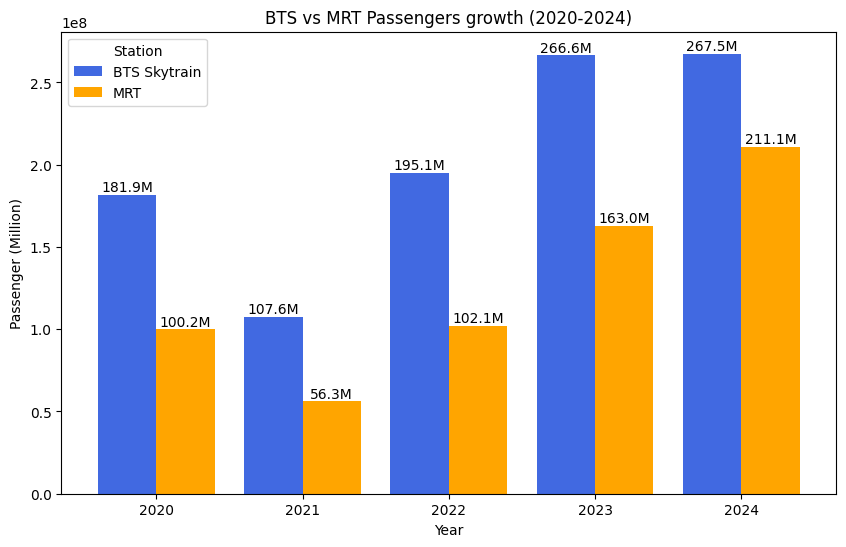

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
# Corrected file path, removed double forward slash
df = pd.read_csv('/content/drive/My Drive/NIDA/Tools/Midterm project/Data_Rail_clean.csv')

# กรองข้อมูลสำหรับ BTS Skytrain และประเภทที่มีคำว่า 'MRT' สำหรับปี 2020-2024
df_filtered = df[(df['Vehicle'].str.contains('MRT', case=False)) &
                 (df['Year'].astype(str).isin(['2020', '2021', '2022', '2023', '2024']))].copy()  # Added .copy()

# รวมข้อมูลที่มีคำว่า MRT ให้เป็น 'MRT' เดียว
df_filtered.loc[:, 'Vehicle'] = 'MRT'  # Use .loc[] to modify the column safely

# แปลงค่าคอลัมน์ Quantity ให้เป็นตัวเลข (ลบเครื่องหมายจุลภาค)
df_filtered.loc[:, 'Quantity'] = df_filtered['Quantity'].astype(str).str.replace(',', '').astype(float)

# กรองข้อมูล BTS Skytrain สำหรับปี 2020-2024
df_bts = df[(df['Vehicle'] == 'BTS Skytrain') &
            (df['Year'].astype(str).isin(['2020', '2021', '2022', '2023', '2024']))].copy()  # Added .copy()
df_bts.loc[:, 'Quantity'] = df_bts['Quantity'].astype(str).str.replace(',', '').astype(float)

# รวมข้อมูลทั้งสองประเภท (BTS Skytrain และ MRT)
df_combined = pd.concat([df_bts[['Year', 'Vehicle', 'Quantity']], df_filtered[['Year', 'Vehicle', 'Quantity']]])

# สรุปรวมค่า Quantity ตามปีและประเภทของ Vehicle
df_summary = df_combined.groupby(['Year', 'Vehicle'])['Quantity'].sum().unstack()


# Plot กราฟแท่ง
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for BTS Skytrain and MRT
df_summary.plot(kind='bar', ax=ax1, color=['royalblue', 'orange'], width=0.8)


# Decoration and labeling
ax1.set_title("BTS vs MRT Passengers growth (2020-2024)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Passenger (Million)")  # Add the unit to the ylabel
ax1.set_xticks(range(len(df_summary.index)))  # Ensure x-ticks are correctly placed
ax1.set_xticklabels(df_summary.index, rotation=0)

# Add value labels on top of the bars (converted to millions)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height / 1e6:.1f}M',
             ha='center', va='bottom', fontsize=10)

# Show the legend for both axes
ax1.legend(title='Station', loc='upper left')

# Save plot to file
plt.savefig('bts_mrt_growth.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()